# Principal Component Analysis
The goal of this question is to build a conceptual understanding of dimensionality reduction using PCA and implement it on a toy dataset. You’ll only have to use numpy and matplotlib for this question.

In [25]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [26]:
# (a) Load data (features)
def load_data():
    
    features = np.load('features.npy')
    labels = np.load('labels.npy', allow_pickle=True)
    
    data = np.concatenate((features, labels.reshape(labels.shape[0],1)), axis = 1)
    data = np.array(data, dtype=np.float64)
    data[:,0:features.shape[1]-1] = ( data[:,0:features.shape[1]-1] - np.mean(data[:,0:features.shape[1]-1], axis=0) ) / np.sqrt( np.var( data[:,0:features.shape[1]-1] , axis=0))
    
    print(data.shape, data[:,8])
    return data

In [27]:
# (b) Perform eigen decomposition and return eigen pairs in desecending order of eigen values
def eigendecomp(X):
    
    cov_mat = ( X[:,0:X.shape[1]-1].T @ X[:,0:X.shape[1]-1] )/X.shape[0]
    w,v = np.linalg.eig(cov_mat)
    
    idx = w.argsort()[::-1]   
    sorted_eig_vals = w[idx]
    sorted_eig_vecs = v[:,idx]
    print(sorted_eig_vecs.shape)
    return (sorted_eig_vals, sorted_eig_vecs)

In [28]:
# (c) Evaluate using variance_explained as the metric
def eval(X, sorted_eig_vals, sorted_eig_vecs):
    k=8
    eig_vecs_trunc = sorted_eig_vecs[:,0:k]
    eig_vals_trunc = sorted_eig_vals[0:k]
    new_features = X[:,0:X.shape[1]-1] @ eig_vecs_trunc
    
    var_features = np.var(new_features, axis = 0)
    
    return new_features, var_features
        


In [29]:
# (d) Visualize after projecting to 2-D space
def viz(new_features, X):
    X_in = ( new_features[:, 0:2] - np.mean(new_features[:, 0:2], axis=0) ) / np.sqrt( np.var(new_features[:, 0:2], axis=0) )
    Y_in = X[:,X.shape[1]-1]
    fig = plt.plot( X_in[Y_in==0, 1],  X_in[Y_in==0, 0], 'bo',  X_in[Y_in ==1, 1],  X_in[Y_in ==1 , 0], 'ro', X_in[Y_in ==2, 1],  X_in[Y_in ==2 , 0], 'go')
    

(150, 9) [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]
(8, 8)


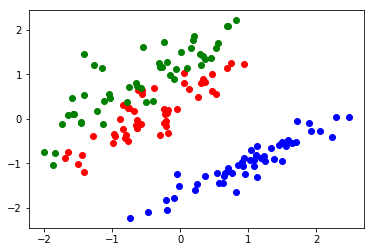

In [30]:
def main():
    
    X= load_data()
    sorted_eig_vals, sorted_eig_vecs = eigendecomp(X)
    new_features, var_features = eval(X, sorted_eig_vals, sorted_eig_vecs)
    viz(new_features, X)

if __name__ == "__main__":
    main()

![PCA failure](pca.jpg)